# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [5]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 591


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [6]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key 

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "&q=" + city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity =  city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | yellowknife
Processing Record 2 of Set 1 | adamstown
Processing Record 3 of Set 1 | myitkyina
Processing Record 4 of Set 1 | papatowai
Processing Record 5 of Set 1 | juan griego
Processing Record 6 of Set 1 | edinburgh of the seven seas
Processing Record 7 of Set 1 | palmas
Processing Record 8 of Set 1 | ushuaia
Processing Record 9 of Set 1 | san antonio de pale
Processing Record 10 of Set 1 | anadyr
Processing Record 11 of Set 1 | usman'
Processing Record 12 of Set 1 | port-aux-francais
Processing Record 13 of Set 1 | gangtok
Processing Record 14 of Set 1 | birjand
Processing Record 15 of Set 1 | haiku-pauwela
Processing Record 16 of Set 1 | mahonda
Processing Record 17 of Set 1 | tsarevo
Processing Record 18 of Set 1 | santa ana
Processing Record 19 of Set 1 | yuzhno-kurilsk
Processing Record 20 of Set 1 | manapparai
Processing Record 21 of Set 1 | cabo san lucas
Processing Record 22 of Set 1 |

In [7]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          566
Lat           566
Lng           566
Max Temp      566
Humidity      566
Cloudiness    566
Wind Speed    566
Country       566
Date          566
dtype: int64

In [8]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,yellowknife,62.4560,-114.3525,50.52,89,75,4.00,CA,1696373852
1,adamstown,-25.0660,-130.1015,68.72,75,81,18.70,PN,1696374069
2,myitkyina,25.3833,97.4000,73.99,100,68,0.94,MM,1696373879
3,papatowai,-46.5619,169.4708,62.92,41,99,12.24,NZ,1696373773
4,juan griego,11.0817,-63.9655,83.79,79,100,9.13,VE,1696374070


In [9]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [10]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,yellowknife,62.4560,-114.3525,50.52,89,75,4.00,CA,1696373852
1,adamstown,-25.0660,-130.1015,68.72,75,81,18.70,PN,1696374069
2,myitkyina,25.3833,97.4000,73.99,100,68,0.94,MM,1696373879
3,papatowai,-46.5619,169.4708,62.92,41,99,12.24,NZ,1696373773
4,juan griego,11.0817,-63.9655,83.79,79,100,9.13,VE,1696374070


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

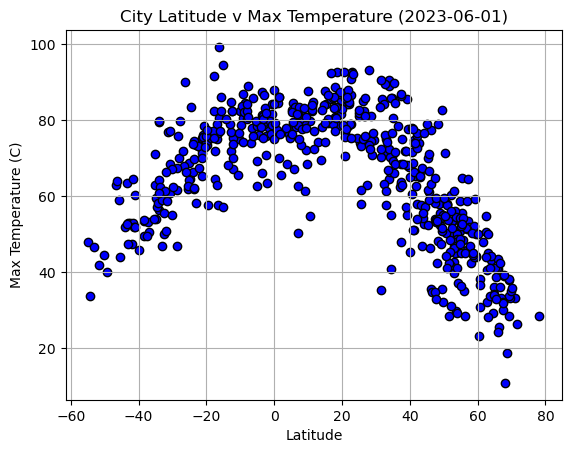

In [11]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df['Lat'], city_data_df['Max Temp'], c = 'blue', edgecolors= 'black')

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (C)')
plt.title('City Latitude v Max Temperature (2023-06-01)')
plt.grid()
# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

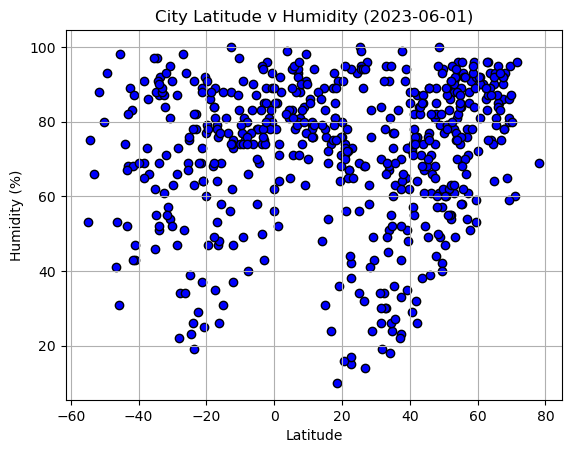

In [12]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df['Lat'], city_data_df['Humidity'], c = 'blue', edgecolors= 'black')

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title('City Latitude v Humidity (2023-06-01)')
plt.grid()
# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

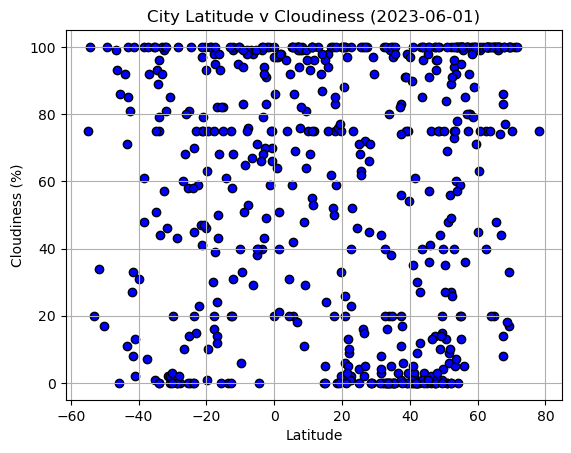

In [13]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df['Lat'], city_data_df['Cloudiness'], c = 'blue', edgecolors= 'black')

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title('City Latitude v Cloudiness (2023-06-01)')
plt.grid()

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

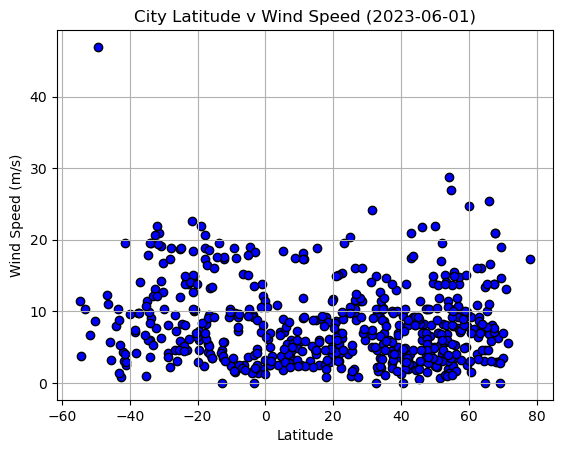

In [14]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df['Lat'], city_data_df['Wind Speed'], c = 'blue', edgecolors= 'black')

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (m/s)')
plt.title('City Latitude v Wind Speed (2023-06-01)')
plt.grid()

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [15]:
# Define a function to create Linear Regression plots
def plot_lin(df, condition1, condition2):
    slope, int, r, p, st_err = linregress(df[condition1], df[condition2])
    fit = slope * df[condition1] + int
    str_fit = f'y = {slope:.2f}x + {int:.2f}'
    plt.scatter(df[condition1], df[condition2])
    plt.xlabel(condition1)
    plt.ylabel(condition2)
    plt.plot(df[condition1], fit, color = 'red')
    print(f'The r value is: {r}')
    
    xmin, xmax, ymin, ymax = plt.axis()
    plt.text(xmin + 10, ymin + 10, str_fit, color = 'red')

In [16]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df['Lat'] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,yellowknife,62.4560,-114.3525,50.52,89,75,4.00,CA,1696373852
2,myitkyina,25.3833,97.4000,73.99,100,68,0.94,MM,1696373879
4,juan griego,11.0817,-63.9655,83.79,79,100,9.13,VE,1696374070
9,anadyr,64.7500,177.4833,36.10,64,20,13.42,RU,1696374071
10,usman',52.0466,39.7288,50.09,55,27,4.00,RU,1696374071


In [25]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df['Lat'] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,adamstown,-25.0660,-130.1015,68.72,75,81,18.70,PN,1696374069
3,papatowai,-46.5619,169.4708,62.92,41,99,12.24,NZ,1696373773
5,edinburgh of the seven seas,-37.0676,-12.3116,50.52,66,92,14.09,SH,1696374070
6,palmas,-10.2128,-48.3603,82.27,74,40,2.30,BR,1696373852
7,ushuaia,-54.8000,-68.3000,47.86,53,75,11.50,AR,1696373891


###  Temperature vs. Latitude Linear Regression Plot

The r value is: -0.8066875564041278


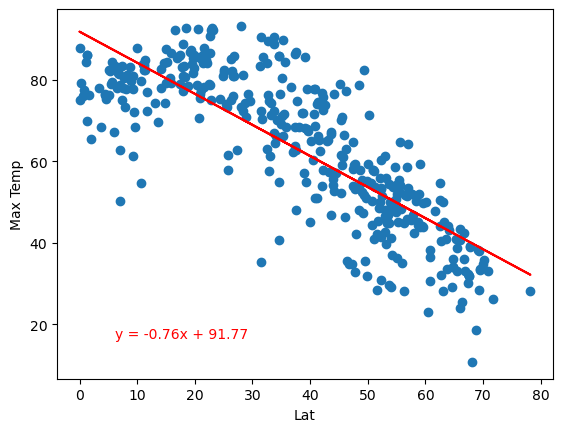

In [26]:
# Linear regression on Northern Hemisphere
plot_lin(northern_hemi_df, 'Lat', 'Max Temp')

The r value is: 0.7667567635312221


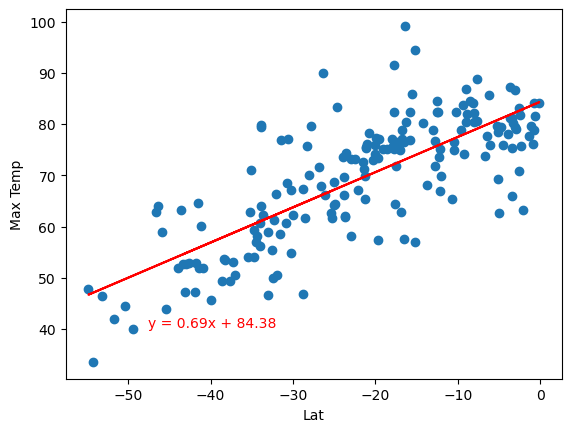

In [28]:
# Linear regression on Southern Hemisphere
plot_lin(southern_hemi_df, 'Lat', 'Max Temp')

**Discussion about the linear relationship:** In the Northern Hemisphere, there is a strong negative correlation between temperature and latitude. In the Southern Hemisphere, there is a strong positive correlation between temperature and latitude.

### Humidity vs. Latitude Linear Regression Plot

The r value is: 0.09193499580497523


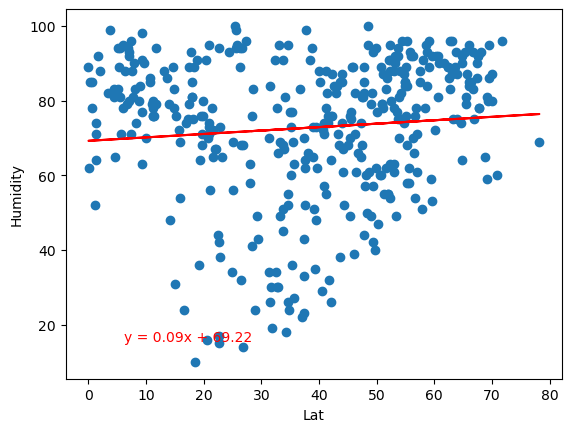

In [22]:
# Northern Hemisphere
plot_lin(northern_hemi_df, 'Lat', 'Humidity')

The r value is: 0.1129918805017183


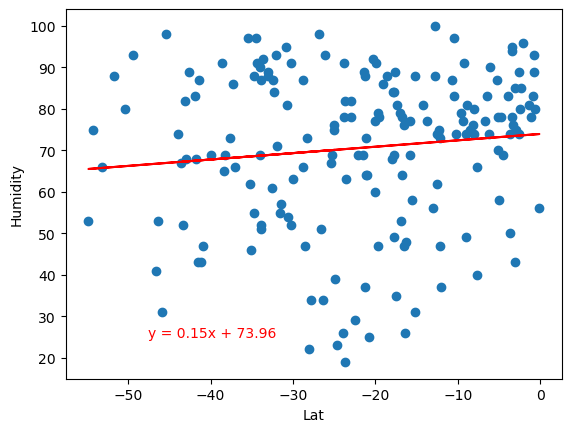

In [21]:
# Southern Hemisphere
plot_lin(southern_hemi_df, 'Lat', 'Humidity')


**Discussion about the linear relationship:** In the Northern Hemisphere, there is a weak positive correlation between humidity and latitude. In the Southern Hemisphere, there is a weak negative correlation between humidity and latitude.

### Cloudiness vs. Latitude Linear Regression Plot

The r value is: 0.05702898511395805


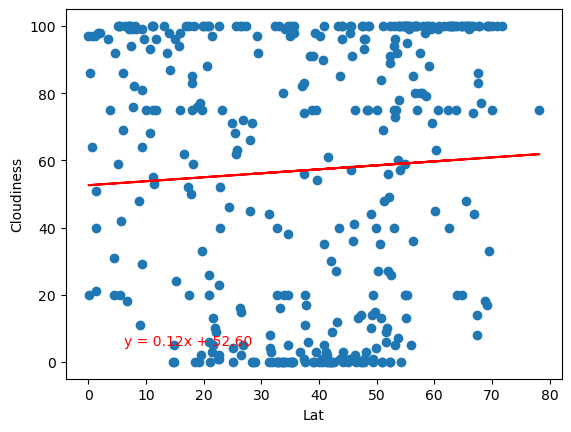

In [29]:
# Northern Hemisphere
plot_lin(northern_hemi_df, 'Lat', 'Cloudiness')

The r value is: 0.14367759846318082


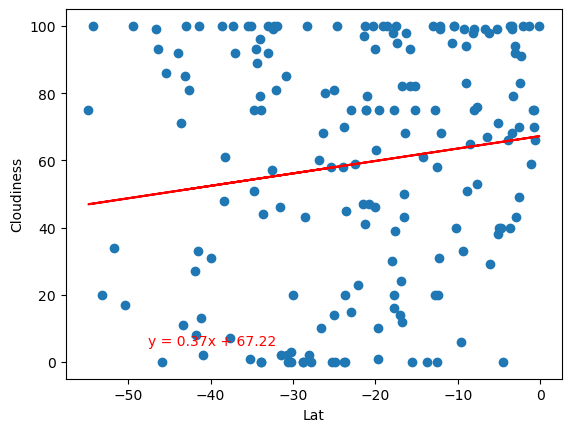

In [30]:
# Southern Hemisphere
plot_lin(southern_hemi_df, 'Lat', 'Cloudiness')

**Discussion about the linear relationship:** In the Northern Hemisphere, there is a weak positive correlation between humidity and latitude. In the Southern Hemisphere, there is a weak negative correlation between humidity and latitude.

### Wind Speed vs. Latitude Linear Regression Plot

The r value is: 0.14404826923841155


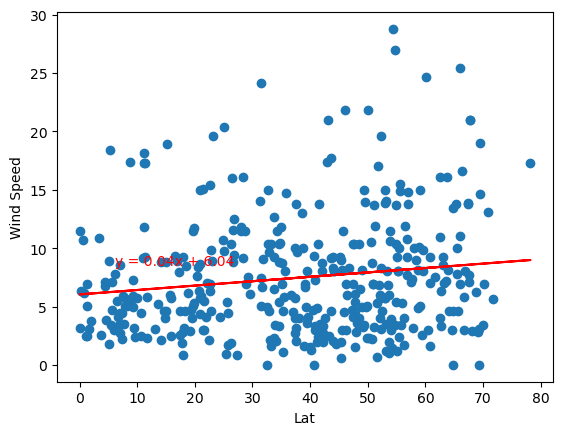

In [31]:
# Northern Hemisphere
plot_lin(northern_hemi_df, 'Lat', 'Wind Speed')

The r value is: -0.13646213305437122


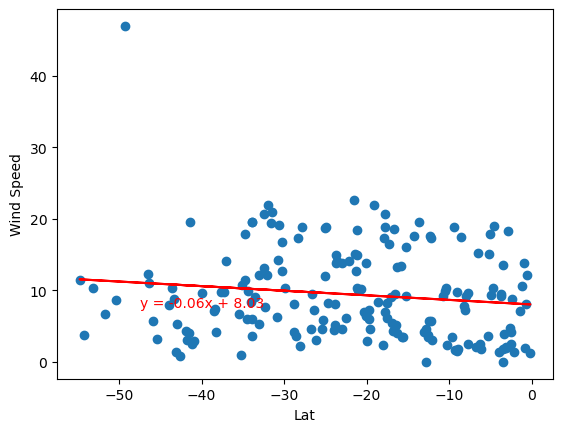

In [32]:
# Southern Hemisphere
plot_lin(southern_hemi_df, 'Lat', 'Wind Speed')

**Discussion about the linear relationship:** In the Northern Hemisphere, there is a weak positive correlation between humidity and latitude. In the Southern Hemisphere, there is a weak negative correlation between humidity and latitude.